In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import decoupler as dc
from pydeseq2.dds import DeseqDataSet
from pydeseq2.ds import DeseqStats
from itertools import combinations
import anndata
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import random

import plotting_functions as pf

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
plate_palette = sns.color_palette("husl", n_colors=3)
sex_palette = ['hotpink','dodgerblue']
geno_palette = ['#DA9CC1', '#F4C245', '#C0BFBF', '#55AF5B', '#4F6EAF', '#52A5DB', '#D83026', '#683C91']


# QC plotting - 200 UMI merged adata

In [3]:
adata = sc.read("../IGVF_analysis/preprocessed_tissues/CortexHippocampuspreprocessed.h5ad")


In [4]:
adata.layers['raw_counts'] = adata.X.copy()


In [5]:
adata

AnnData object with n_obs × n_vars = 2618643 × 56953
    obs: 'bc', 'bc1_sequence', 'bc2_sequence', 'bc3_sequence', 'subpool', 'bc1_well', 'bc2_well', 'bc3_well', 'Mouse_Tissue_ID', 'alias_tissue1', 'alias_tissue2', 'alias_tissue3', 'alias_tissue4', 'plate', 'Protocol', 'Chemistry', 'well_type', 'Row', 'Column', 'Genotype', 'Notes', 'Multiplexed_sample1', 'Multiplexed_sample2', 'SampleType', 'Tissue', 'Tissue_ID', 'Tissue1_ontology_id', 'Tissue2_ontology_id', 'Sex', 'Replicate', 'DOB', 'Age_weeks', 'Age_days', 'Body_weight_g', 'Estrus_cycle', 'Dissection_date', 'Dissection_time', 'Dissector', 'Tissue_weight_mg', 'mult_genotype_1', 'mult_genotype_2', 'mult_genotype', 'n_counts', 'doublet_scores', 'batch'
    var: 'gene_name'
    layers: 'raw_counts'

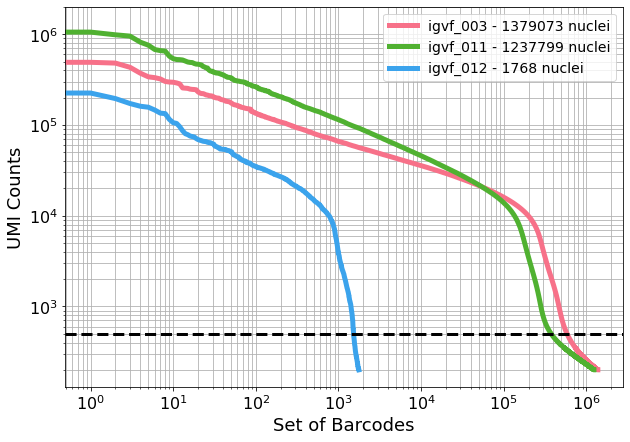

In [6]:
pf.plot_knee(adata, cutoff=500, category_column='plate', figsize=(10, 7))
plt.show()

In [7]:
# set var names to be gene names, not gene ID
adata.var_names  = adata.var['gene_name']
adata.var['mt'] = adata.var_names.str.startswith('mt-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)


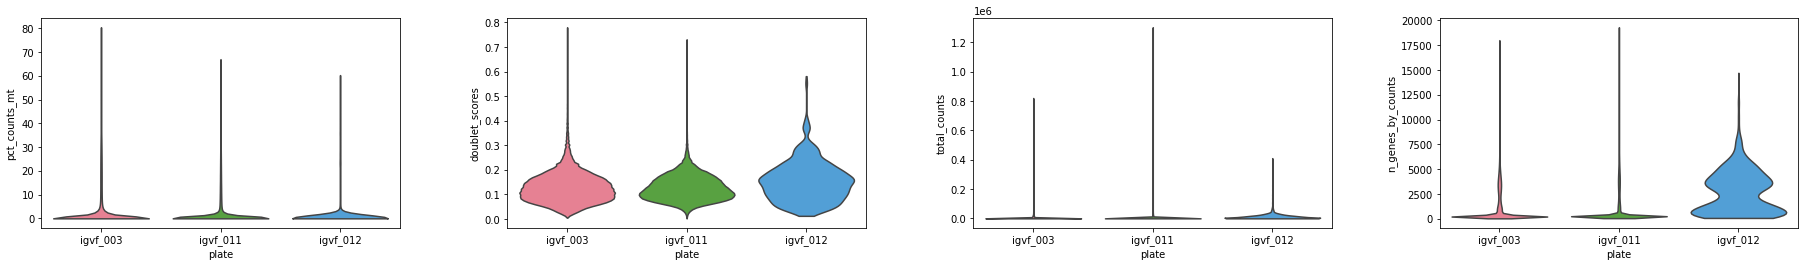

In [8]:
plate_palette = sns.color_palette("husl", n_colors=3)

sc.pl.violin(adata, ['pct_counts_mt', 'doublet_scores', 'total_counts', 'n_genes_by_counts'],
             groupby = "plate", palette = plate_palette,
             jitter=0.4, multi_panel=True, size=0)

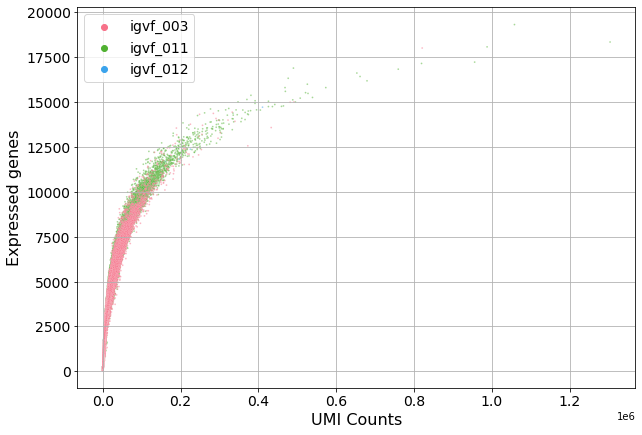

In [9]:
pf.plot_genes_by_counts(adata, category_column='plate', figsize=(10, 7))
plt.show()

In [10]:
adatas = adata[(adata.obs['total_counts'] < 10000) & (adata.obs['n_genes_by_counts'] < 2000), :]


/opt/apps/python/3.8.0/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


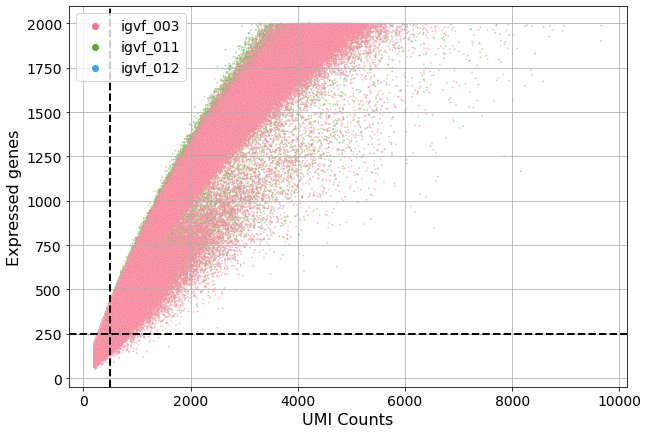

In [11]:
pf.plot_genes_by_counts(adatas, category_column='plate', figsize=(10, 7))

plt.axvline(x=500, color='k', linestyle='--', linewidth=2)
plt.axhline(y=250, color='k', linestyle='--', linewidth=2)

plt.show()

In [12]:
adatas[(adatas.obs['total_counts'] > 500) & (adatas.obs['n_genes_by_counts'] < 250), :]


View of AnnData object with n_obs × n_vars = 4147 × 56953
    obs: 'bc', 'bc1_sequence', 'bc2_sequence', 'bc3_sequence', 'subpool', 'bc1_well', 'bc2_well', 'bc3_well', 'Mouse_Tissue_ID', 'alias_tissue1', 'alias_tissue2', 'alias_tissue3', 'alias_tissue4', 'plate', 'Protocol', 'Chemistry', 'well_type', 'Row', 'Column', 'Genotype', 'Notes', 'Multiplexed_sample1', 'Multiplexed_sample2', 'SampleType', 'Tissue', 'Tissue_ID', 'Tissue1_ontology_id', 'Tissue2_ontology_id', 'Sex', 'Replicate', 'DOB', 'Age_weeks', 'Age_days', 'Body_weight_g', 'Estrus_cycle', 'Dissection_date', 'Dissection_time', 'Dissector', 'Tissue_weight_mg', 'mult_genotype_1', 'mult_genotype_2', 'mult_genotype', 'n_counts', 'doublet_scores', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_name', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    layers: 'raw_counts'

# QC plotting - filtered data
500 UMI, 250 genes, 1% mito, 0.25 doublet score


In [3]:
adata = sc.read("../IGVF_analysis/tissue_processed_500umi/CortexHippocampus_processed.h5ad")


In [4]:
print(adata.obs['Genotype'].value_counts())

adata = adata[adata.obs['Genotype'] != "tie",:]

print(adata.obs['Genotype'].value_counts())

Genotype
NODJ      115595
AJ        107974
NZOJ      102507
B6J        97478
PWKJ       87541
CASTJ      86632
129S1J     77900
WSBJ       76695
tie         8481
Name: count, dtype: int64
Genotype
NODJ      115595
AJ        107974
NZOJ      102507
B6J        97478
PWKJ       87541
CASTJ      86632
129S1J     77900
WSBJ       76695
Name: count, dtype: int64


In [5]:
adata

View of AnnData object with n_obs × n_vars = 752322 × 56953
    obs: 'bc', 'bc1_sequence', 'bc2_sequence', 'bc3_sequence', 'subpool', 'bc1_well', 'bc2_well', 'bc3_well', 'Mouse_Tissue_ID', 'alias_tissue1', 'alias_tissue2', 'alias_tissue3', 'alias_tissue4', 'plate', 'Protocol', 'Chemistry', 'well_type', 'Row', 'Column', 'Genotype', 'Notes', 'Multiplexed_sample1', 'Multiplexed_sample2', 'SampleType', 'Tissue', 'Tissue_ID', 'Tissue1_ontology_id', 'Tissue2_ontology_id', 'Sex', 'Replicate', 'DOB', 'Age_weeks', 'Age_days', 'Body_weight_g', 'Estrus_cycle', 'Dissection_date', 'Dissection_time', 'Dissector', 'Tissue_weight_mg', 'mult_genotype_1', 'mult_genotype_2', 'mult_genotype', 'n_counts', 'doublet_scores', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden'
    var: 'gene_name', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'le

In [6]:
adata.var_names  = adata.var['gene_name']


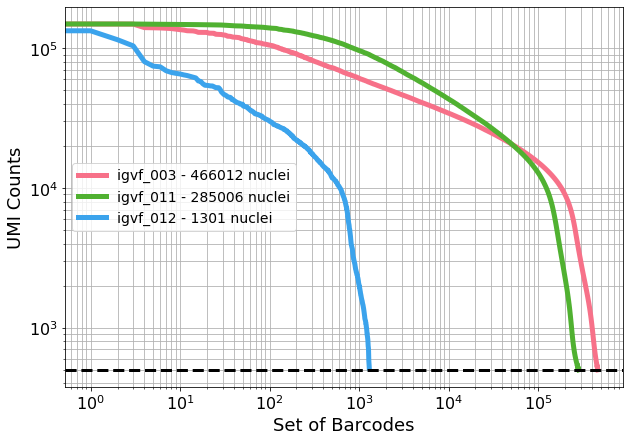

In [7]:
pf.plot_knee(adata, cutoff=500, category_column='plate', figsize=(10, 7))
plt.show()

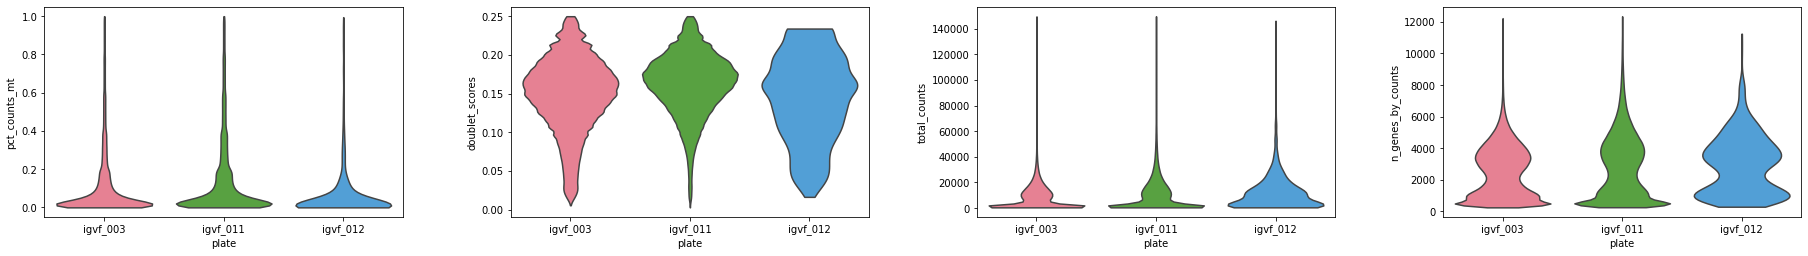

In [8]:
sc.pl.violin(adata, ['pct_counts_mt', 'doublet_scores', 'total_counts', 'n_genes_by_counts'],
             groupby = "plate", palette = plate_palette,
             jitter=0.4, multi_panel=True, size=0)

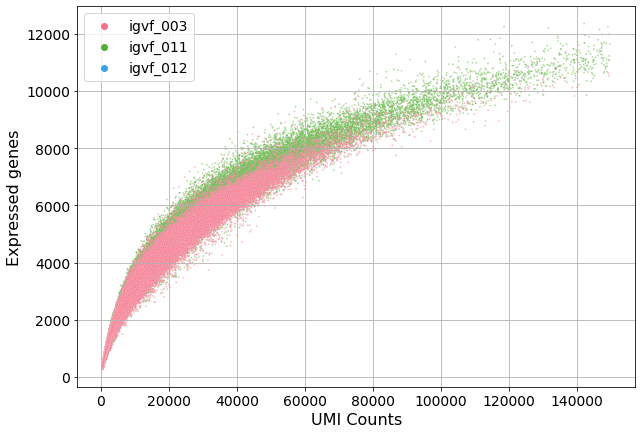

In [9]:
pf.plot_genes_by_counts(adata, category_column='plate', figsize=(10, 7))
plt.show()

# Check clustering
Plate, sex, genotype

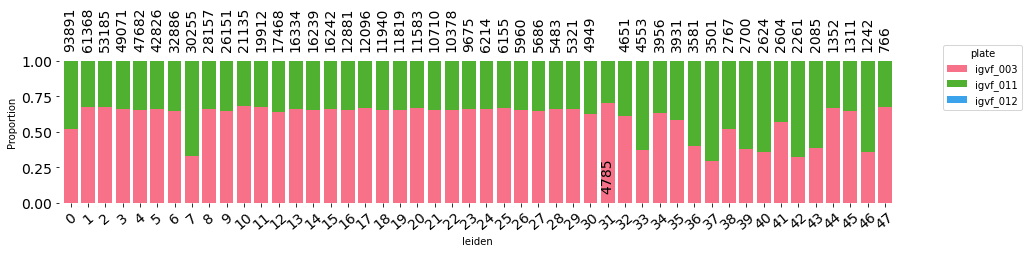

In [10]:
pf.stacked_barplot_proportions(adata.obs, 
                            'leiden', 'plate',
                            flip=False, fsize = (15,3), 
                            annotations = True)


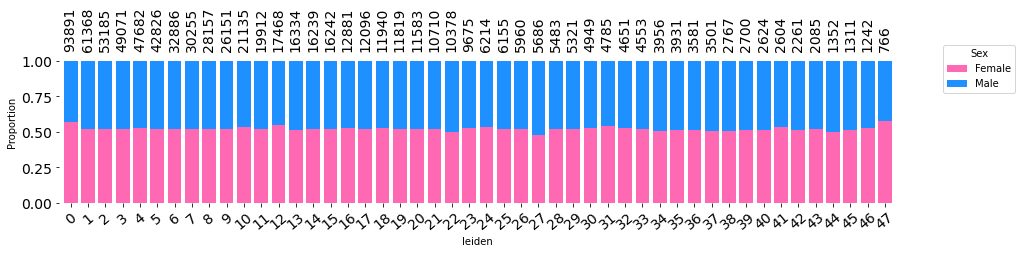

In [11]:
pf.stacked_barplot_proportions(adata.obs, 
                            'leiden', 'Sex',
                            flip=False, fsize = (15,3), 
                            annotations = True)


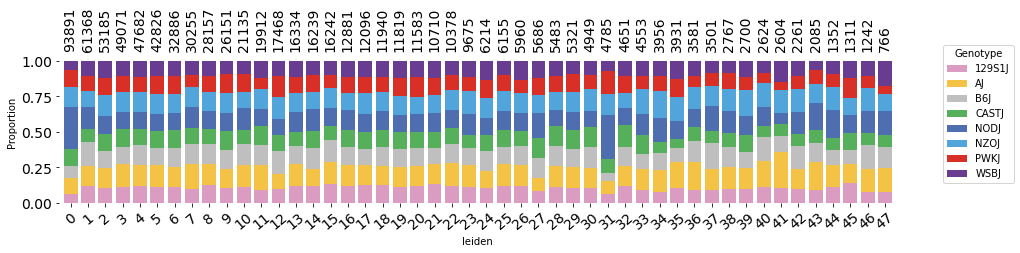

In [12]:
pf.stacked_barplot_proportions(adata.obs, 
                            'leiden', 'Genotype',
                            flip=False, fsize = (15,3), 
                            annotations = True)


/opt/apps/python/3.8.0/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


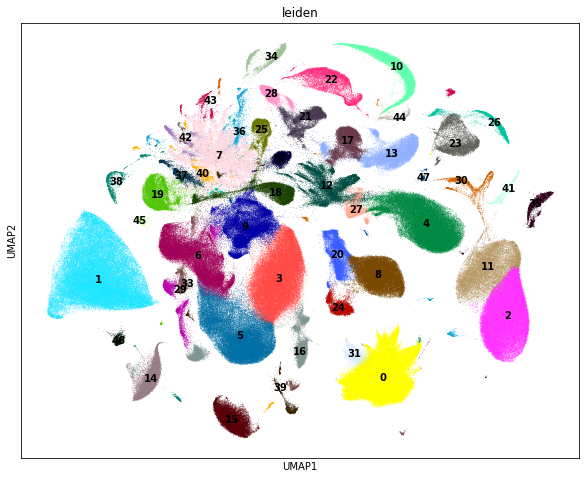

/opt/apps/python/3.8.0/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


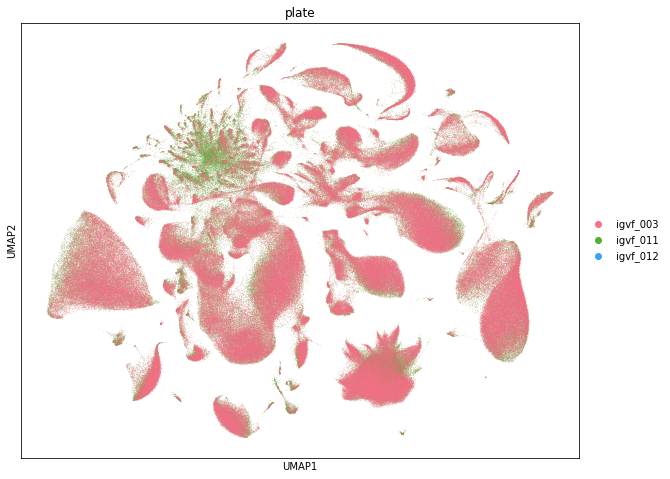

/opt/apps/python/3.8.0/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


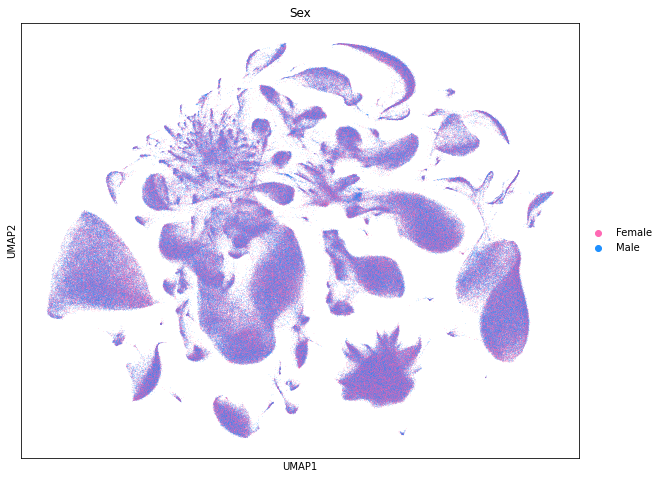

/opt/apps/python/3.8.0/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


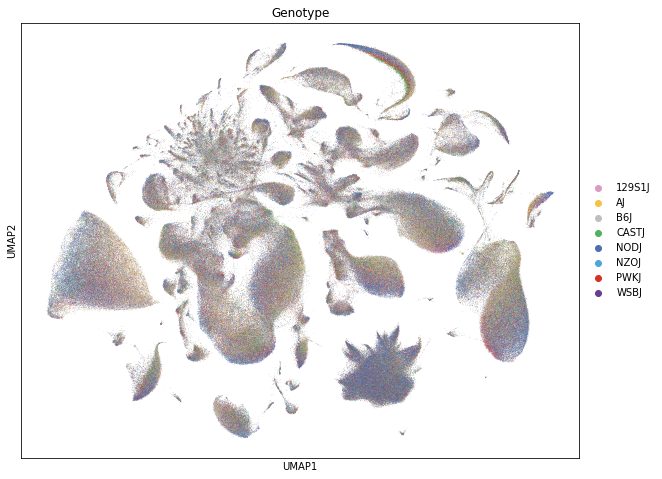

In [13]:
plt.rcParams['figure.figsize'] = (10, 8)

sc.pl.umap(adata, color=['leiden'], size=1, legend_loc = 'on data')

sc.pl.umap(adata, color=['plate'], size = 0.8, palette = plate_palette)

sc.pl.umap(adata, color=['Sex'], size = 0.8, palette = sex_palette)

sc.pl.umap(adata, color=['Genotype'], size = 0.8, palette = geno_palette)



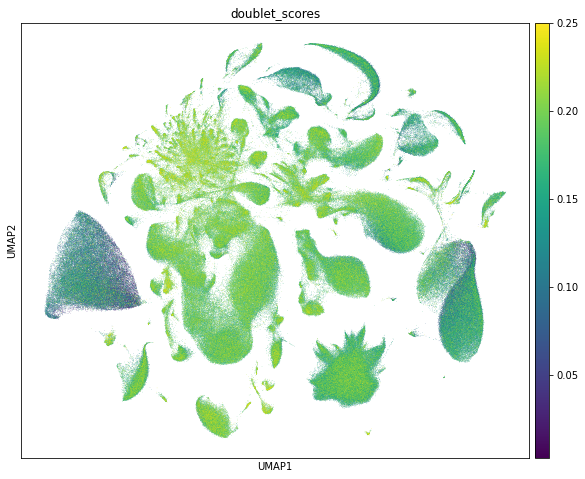

In [14]:
sc.pl.umap(adata, color=['doublet_scores'], size = 0.8)


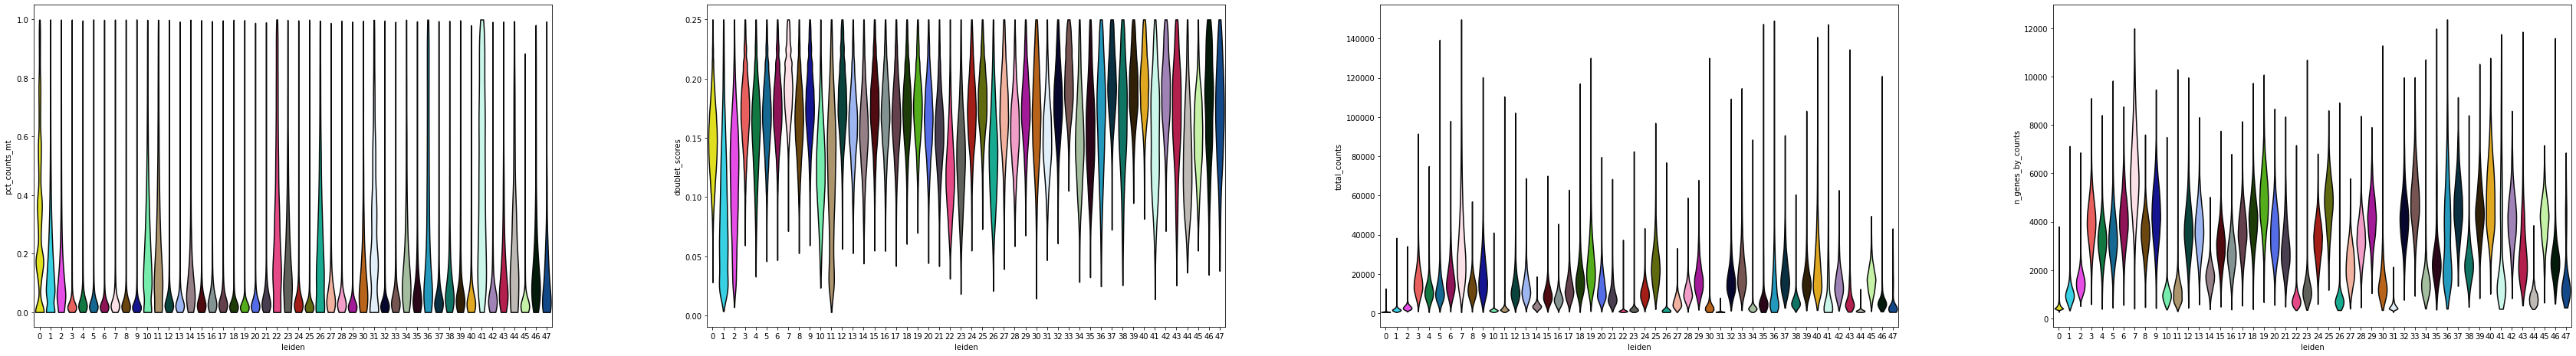

In [15]:
sc.pl.violin(adata, ['pct_counts_mt', 'doublet_scores', 'total_counts', 'n_genes_by_counts'],
             groupby = "leiden", 
             jitter=0.4, multi_panel=True, size=0)

# Check marker gene expression

In [16]:
markers_df = pd.read_csv("IGVF_curated_markers.csv")
markers_df = markers_df[markers_df['Tissue'] == 'CortexHippocampus']
marker_genes_dict = {}

for index, row in markers_df.iterrows():
    gene = row['Gene']
    subtype = row['Subtype']

    if subtype not in marker_genes_dict:
        marker_genes_dict[subtype] = [gene]
    else:
        marker_genes_dict[subtype].append(gene)

categories: 0, 1, 2, etc.
var_group_labels: Astrocyte, CA1, CA2, etc.


/opt/apps/python/3.8.0/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


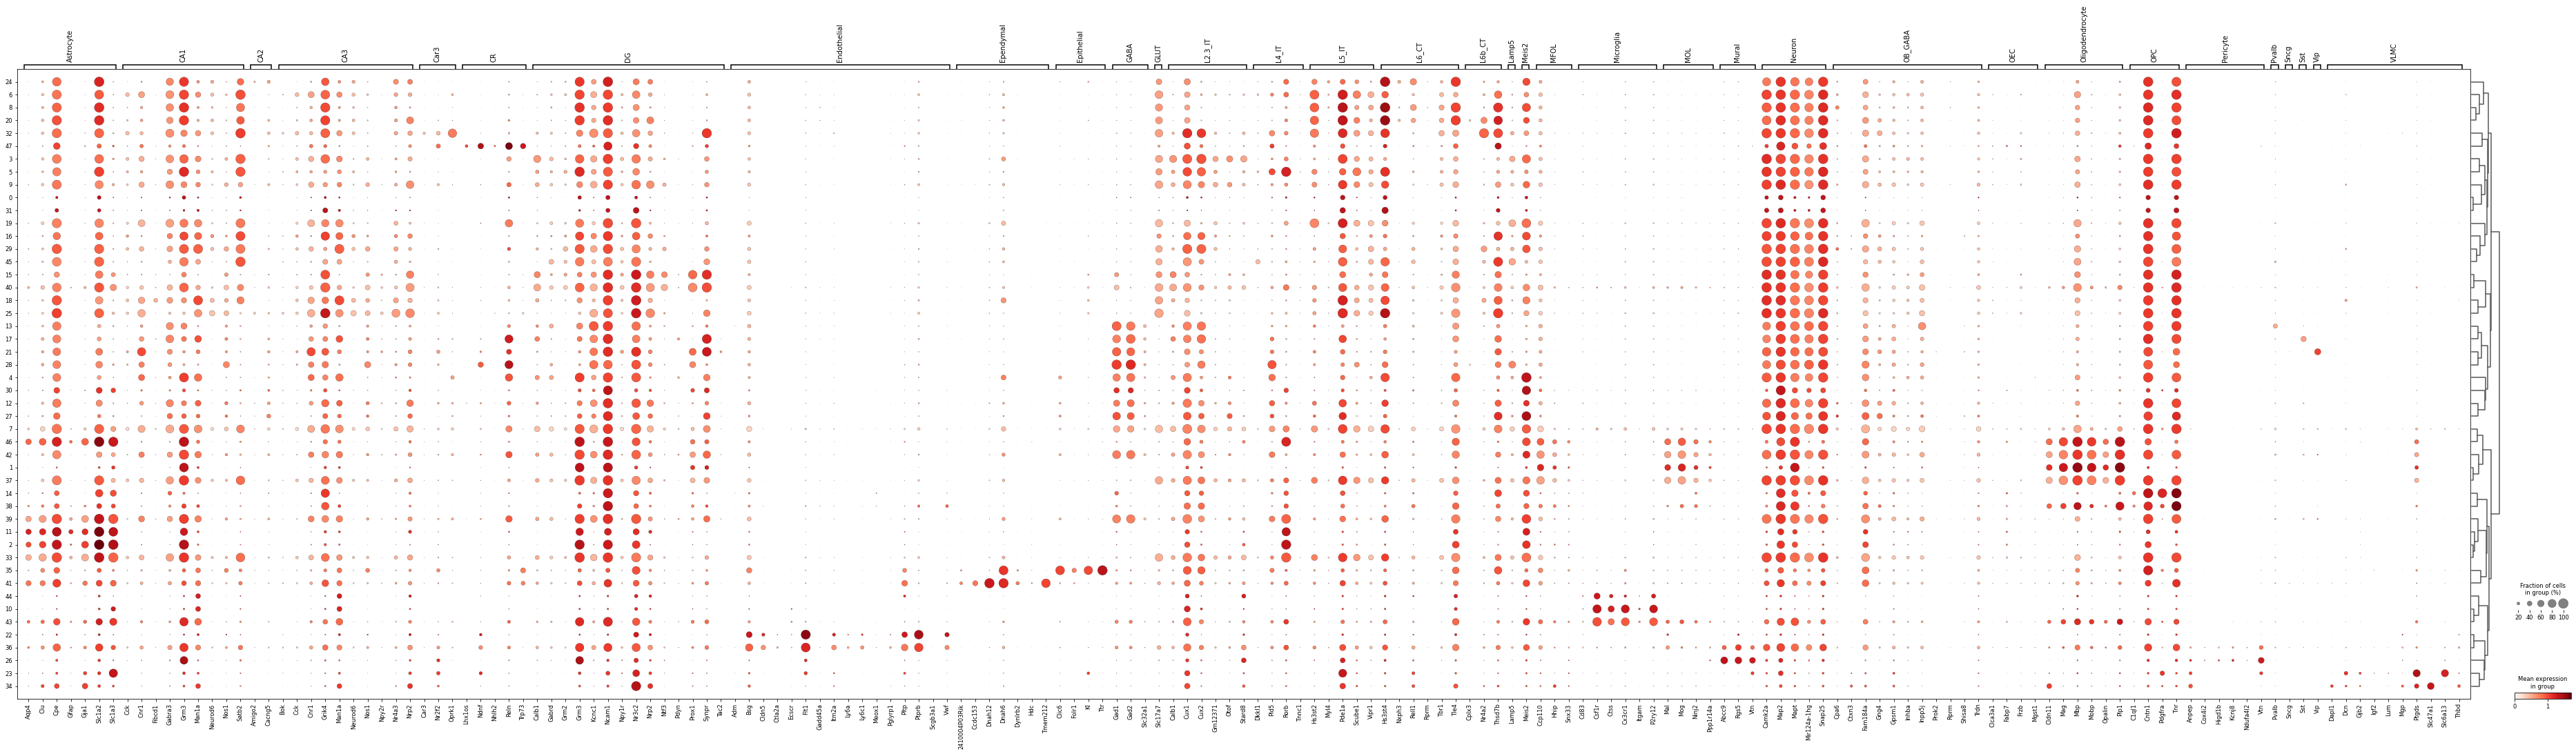

In [17]:
sc.pl.dotplot(adata, marker_genes_dict, 'leiden', mean_only_expressed = True,
              dendrogram=True, log=True)


In [18]:
smol_marker_genes_dict = {
    "Endothelial": ["Flt1"],
    "Pericyte": ["Vtn"],
    "Fibroblast": ["Bnc2","Fbxl7"],
    "VLMC": ["Dcn"],
    "Epithelial":["Kl","Ttr","Clic6"],
    "Ependymal":["Tmem212","Dnah6"],
    "Microglia": ["Cx3cr1"],
    "Astrocyte": ["Gfap","Clu"],
    "Glutamatergic": ["Slc17a7"],
    "GABAergic": ["Gad1","Gad2",],
    "CR": ["Reln"],
    "Meis2": ["Meis2"],
    "Lamp5": ["Lamp5"],
    "Vip": ["Vip"],
    "Sst": ["Sst"],
    "Pvalb": ["Pvalb"],
    "Car3": ["Car3","Oprk1"],
    "DG_early": ["Prox1"],
    "DG": ["Calb1"],
    "L2/3": ['Otof','Calb1'],
    "L4": ["Pld5"],
    "L6": ["Scube1","Hs3st2","Pde1a"],
    "OPC": ["Pdgfra"],
    "COP": ["C1ql1"],
    "MFOL": ["Mag","Mog"],
    "MOL": ["Plp1"],
    "Heart": ["Ryr1","Gata4"],
    "Gastrocnemius": ["Myh4","Ttn"]
}



categories: 0, 1, 2, etc.
var_group_labels: Endothelial, Pericyte, Fibroblast, etc.


/opt/apps/python/3.8.0/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


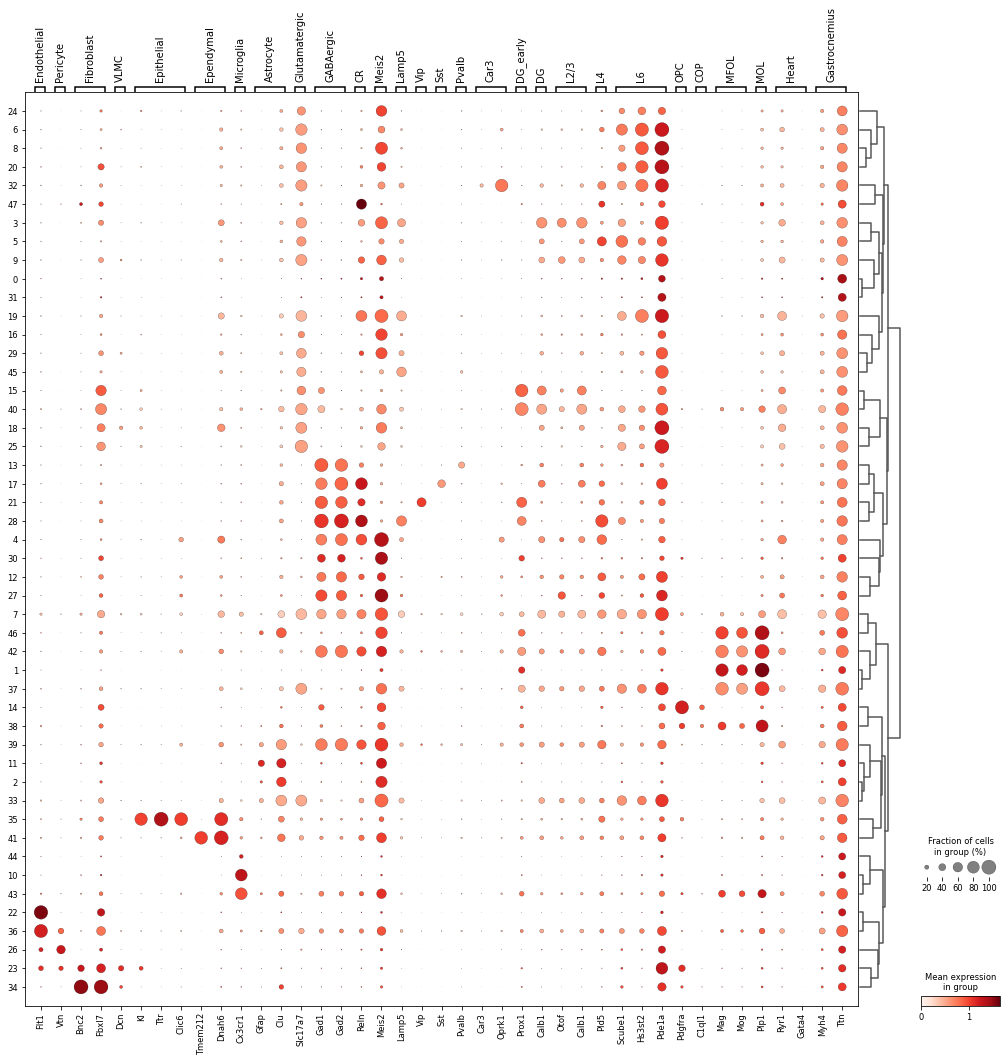

In [19]:
sc.pl.dotplot(adata, smol_marker_genes_dict, 'leiden', mean_only_expressed = True,
              dendrogram=True, log=True)


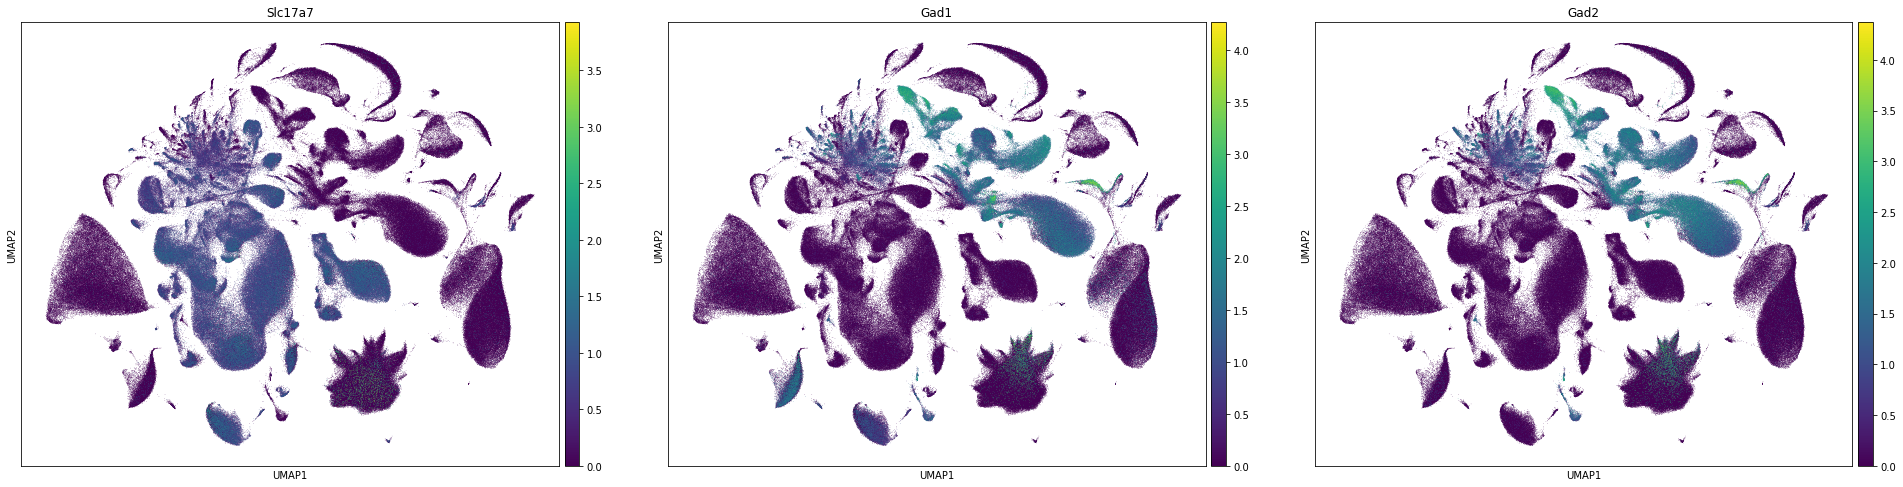

In [20]:
plt.rcParams['figure.figsize'] = (10, 8)

sc.pl.umap(adata, color=['Slc17a7','Gad1','Gad2'], size=1)



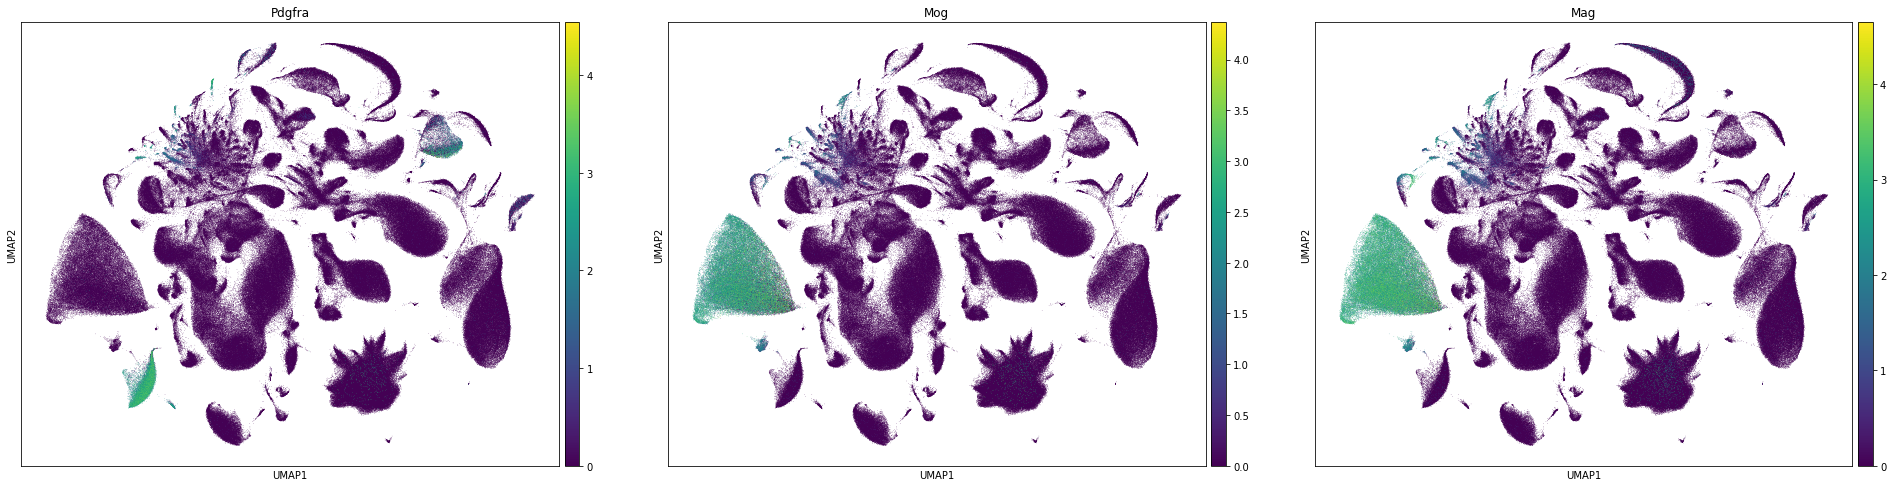

In [21]:
sc.pl.umap(adata, color=['Pdgfra','Mog','Mag'], size=1)

# Assign celltypes to clusters

In [22]:
annots = pd.read_csv("CortexHippocampus_annotations.csv")
annots['leiden'] = annots['leiden'].astype(str)
annotation_dict_celltype = annots.groupby('leiden').head(1).set_index('leiden')['celltype'].to_dict()
annotation_dict_gen_celltype = annots.groupby('leiden').head(1).set_index('leiden')['gen_celltype'].to_dict()


In [23]:
adata.obs['celltype'] = adata.obs['leiden'].map(annotation_dict_celltype)

adata.obs['gen_celltype'] = adata.obs['leiden'].map(annotation_dict_gen_celltype)

/opt/apps/python/3.8.0/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/opt/apps/python/3.8.0/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


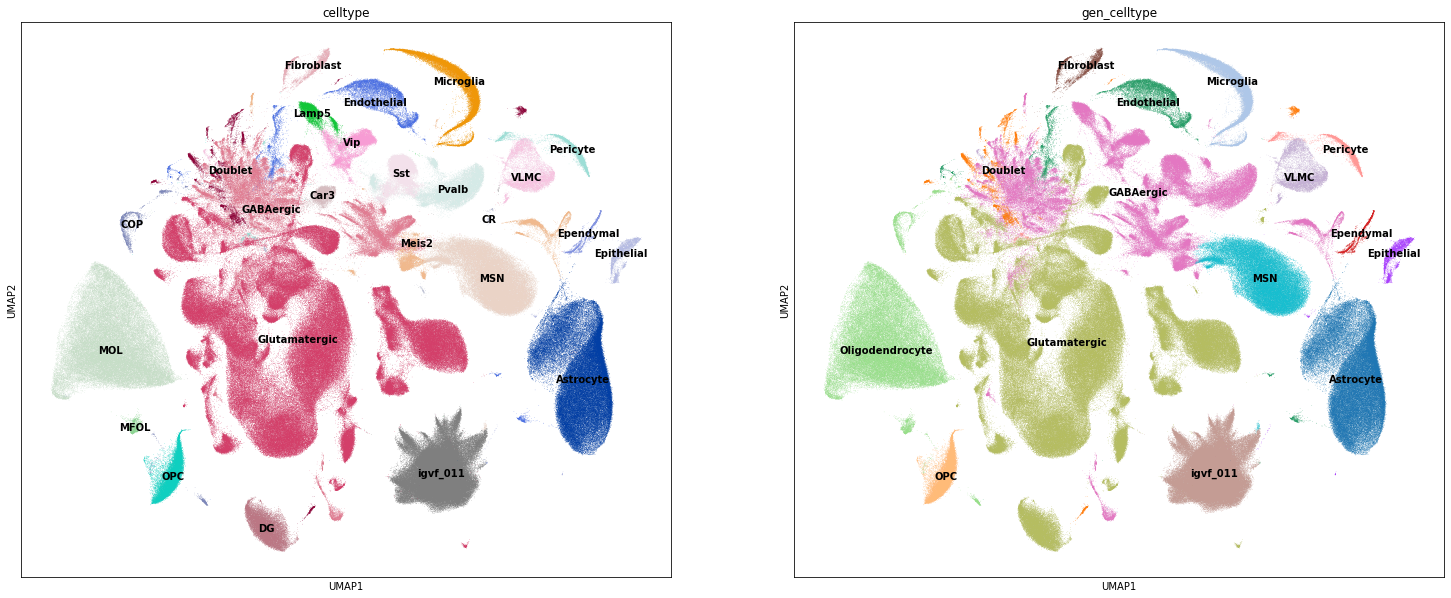

In [24]:
plt.rcParams['figure.figsize'] = (12, 10)

sc.pl.umap(adata, color=['celltype','gen_celltype'], size=1, legend_loc = 'on data')


categories: Astrocyte, COP, CR, etc.
var_group_labels: Endothelial, Pericyte, Fibroblast, etc.


/opt/apps/python/3.8.0/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


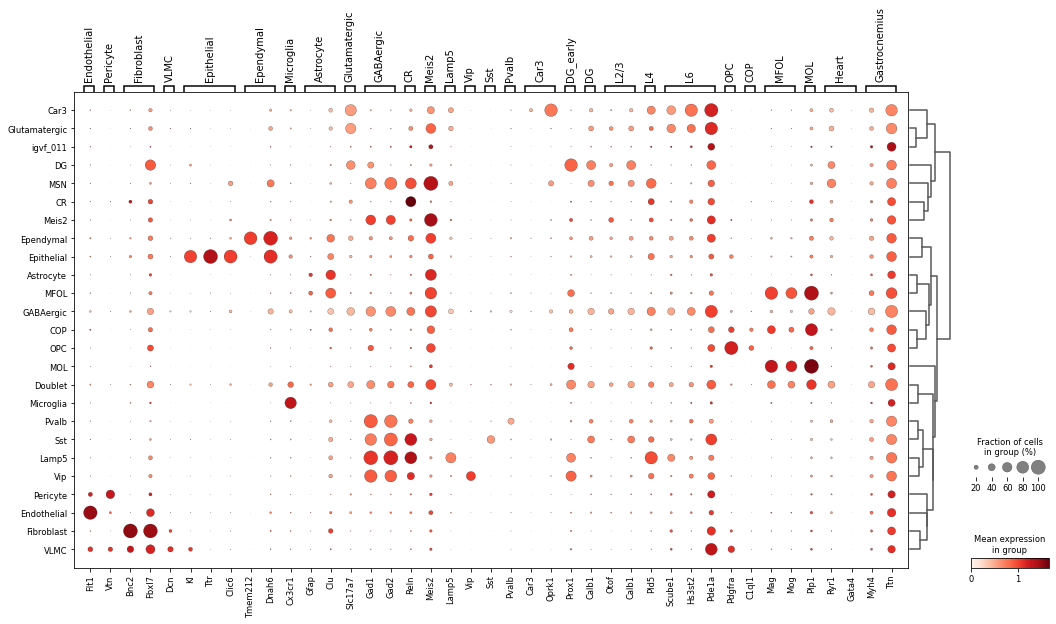

In [25]:
sc.pl.dotplot(adata, smol_marker_genes_dict, 'celltype', mean_only_expressed = True,
              dendrogram=True, log=True)


categories: Astrocyte, Doublet, Endothelial, etc.
var_group_labels: Endothelial, Pericyte, Fibroblast, etc.


/opt/apps/python/3.8.0/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


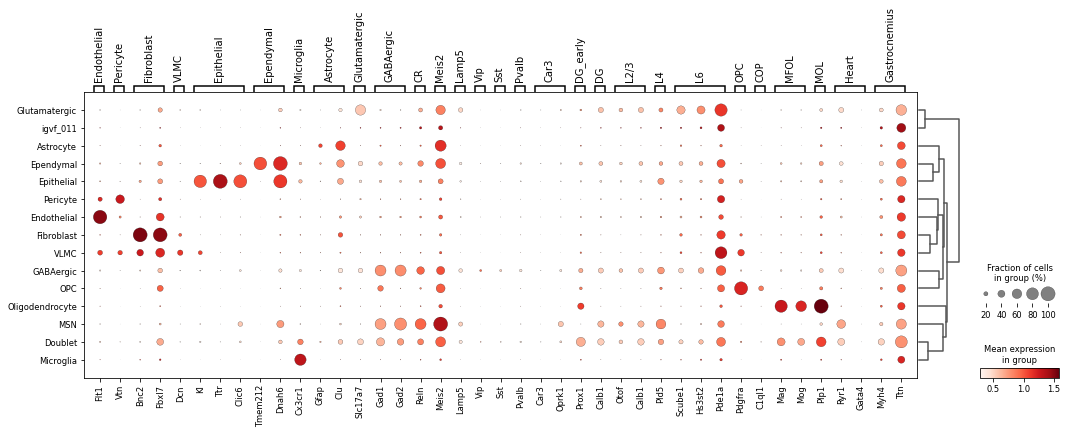

In [26]:
sc.pl.dotplot(adata, smol_marker_genes_dict, 'gen_celltype', mean_only_expressed = True,
              dendrogram=True, log=True)


# Save annotated adata

In [27]:
adata.write_h5ad('../IGVF_analysis/annotated_tissues/CortexHippocampus_annotated.h5ad')
